# Домашнее задание "Проблема качества данных"

#### Cоздать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Создаём dataset

# количество сэмплов
n_samples = 1000

# генерируем признаки
age = np.random.choice(70, n_samples) + 15
distance = np.random.choice(120, n_samples) + 25
rate = np.random.choice(25, n_samples) + 10

# генерируем целевую переменную
price = distance * rate * 90 + 127

data = pd.DataFrame({'age': age, 'distance': distance, 'rate': rate, 'price': price})
data.head(5)

,age,distance,rate,price
0,59,111,28,279847
1,49,80,24,172927
2,15,87,23,180217
3,58,83,27,201817
4,61,80,14,100927


In [3]:
# информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1000 non-null   int32
 1   distance  1000 non-null   int32
 2   rate      1000 non-null   int32
 3   price     1000 non-null   int32
dtypes: int32(4)
memory usage: 15.8 KB


Датасет состоит из 1000 строк и 4-х столбцов. Пропущенных данных нет. Значения столбцов числовые дискретные в формате int32. Категориальные признаки отсутствуют, перекодировка признаков не требуется.

In [4]:
# статистические данные о датасете
data.describe()

,age,distance,rate,price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.186000,83.330000,22.216000,167666.410000
std,20.053817,34.127229,7.130651,91675.003384
min,15.000000,25.000000,10.000000,26227.000000
25%,31.000000,53.000000,16.000000,92467.000000
50%,47.000000,84.000000,22.000000,149887.000000
75%,65.000000,111.000000,28.250000,227692.000000
max,84.000000,144.000000,34.000000,434647.000000


In [5]:
# выделим в датасете признаки ['age', 'distance', 'rate'] и целевую переменную ['price']

X = data[['age', 'distance', 'rate']]
y = data['price']

# обучение модели линейной регрессии
reg = LinearRegression().fit(X, y)

# вывод коэффициентов линейной регрессии
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

# прогнозирование целевой переменной 
pred_values = reg.predict(data[['age', 'distance', 'rate']])

# вывод абсолютной ошибки линейной регрессии
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [  -8.41351105 2007.15171788 7574.17988469]
Bias: -167452.1095261595
Error: 16443.786809552435


Результат модели содержит большие значения коэффициентов. Также ошибка очень велика по сравнению со значением целевой переменной. Error: 16042.342696488864, median price: 146512.0

In [6]:
y.median()

149887.0

Посмотрим на результат модели при отбрасывании одного из признаков, например age.

In [7]:
X = data[['distance', 'rate']]
y = data['price']
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(data[['distance', 'rate']])
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [2007.12322232 7574.94114966]
Bias: -167872.0606969621
Error: 16441.62299078795


Результат модели почти не отличается от предыдущего. Можно предположить, что признак age не оказывает влияние на целевую переменную price.

Попробуем вручную сгенерировать новый признак из произведения двух оставшихся признаков (предугадать зависимость price от признаков distance, rate).

Используем искусственный признак для обучения модели.

In [8]:
# Создаем новый признак
data['mult'] = data['distance'] * data['rate']
data.head(5)

,age,distance,rate,price,mult
0,59,111,28,279847,3108
1,49,80,24,172927,1920
2,15,87,23,180217,2001
3,58,83,27,201817,2241
4,61,80,14,100927,1120


In [9]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(data[['mult']])
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [90.]
Bias: 127.0
Error: 0.0


Модель дает низкую ошибку, т.е. предположение что целевая переменная зависит от произведения признаков distance, rate оказалось верным.

(Коэффициенты модели такие же, как в формуле генерации целевой переменной price = distance * rate * 90 + 127)

Как видно из графика, линейная регрессия точно описывает зависимость целевой переменной.

<AxesSubplot:xlabel='mult', ylabel='price'>

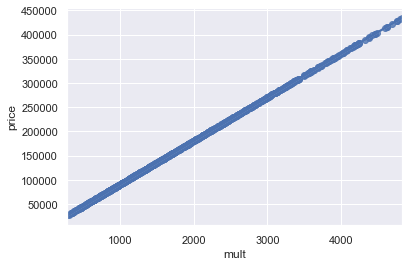

In [10]:
# график линейной регрессии
sns.set_theme(color_codes=True)
sns.regplot(x = 'mult', y = 'price', data = data)

Если форму зависимости целевой переменной от признаков предположить сложно, можно использовать PolynomialFeatures.

Сгенерируем полиномиальную зависимость признаков 2-й степени и построим на них линейную регрессию.

In [11]:
from sklearn.preprocessing import PolynomialFeatures


In [12]:
# генерируем зависимость признаков

poly = PolynomialFeatures(2) # 2 - степень полинома

X = poly.fit_transform(data[['age', 'distance', 'rate']])
y = data['price']

poly.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

Используем эти признаки для обучения модели линейной регрессии.

In [13]:
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(X)
print(f'Error: {mean_absolute_error(pred_values, y)}')

Weights: [ 0.00000000e+00 -4.86366503e-12 -4.67041683e-12  1.37620471e-12
  3.24185123e-14 -3.01980663e-14 -1.77635684e-14  1.06581410e-14
  9.00000000e+01 -5.52891066e-14]
Bias: 127.00000000043656
Error: 1.11504050437361e-10


Как видно из результатов модели, значения коэффициентов '1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x2^2' очень малы и не оказывают влияния на зависимость, т.е. эти признаки не соответствуют модели зависимости целевой переменной.

Значение коэффициента 'x1 x2': 9.00000000e+01 и Bias: 126.99999999947613. Таким образом можно найти признаки, оказывающие влияние на целевую переменную и форму зависимости ('x1*x2').
Зависимость соответствует формуле генерации целевой переменной price = distance * rate * 90 + 127.

Ошибка Error: 1.4120087143965066e-10 очень низкая.

Линейная регрессия точно описывает зависимость целевой переменной.